In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.cluster import KMeans

In [34]:
df = pd.read_csv('College_Data.csv')
df.drop('Unnamed: 0', axis= 1, inplace = True)
df

Private   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0       Yes   1660    1232     721         23         52         2885   
1       Yes   2186    1924     512         16         29         2683   
2       Yes   1428    1097     336         22         50         1036   
3       Yes    417     349     137         60         89          510   
4       Yes    193     146      55         16         44          249   
..      ...    ...     ...     ...        ...        ...          ...   
772      No   2197    1515     543          4         26         3089   
773     Yes   1959    1805     695         24         47         2849   
774     Yes   2097    1915     695         34         61         2793   
775     Yes  10705    2453    1317         95         99         5217   
776     Yes   2989    1855     691         28         63         2988   

     P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0            537      7440        3300    450      2200   70        78   
1           1227     12280        6450    750      1500   29        30   
2             99     11250        3750    400      1165   53        66   
3             63     12960        5450    450       875   92        97   
4            869      7560        4120    800      1500   76        72   
..           ...       ...         ...    ...       ...  ...       ...   
772         2029      6797        3900    500      1200   60        60   
773         1107     11520        4960    600      1250   73        75   
774          166      6900        4200    617       781   67        75   
775           83     19840        6510    630      2115   96        96   
776         1726      4990        3560    500      1250   75        75   

     S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0         18.1           12    7041         60  
1         12.2           16   10527         56  
2         12.9           30    8735         54  
3          7.7           37   19016         59  
4         11.9            2   10922         15  
..         ...          ...     ...        ...  
772       21.0           14    4469         40  
773       13.3           31    9189         83  
774       14.4           20    8323         49  
775        5.8           49   40386         99  
776       18.1           28    4509         99  

[777 rows x 18 columns]

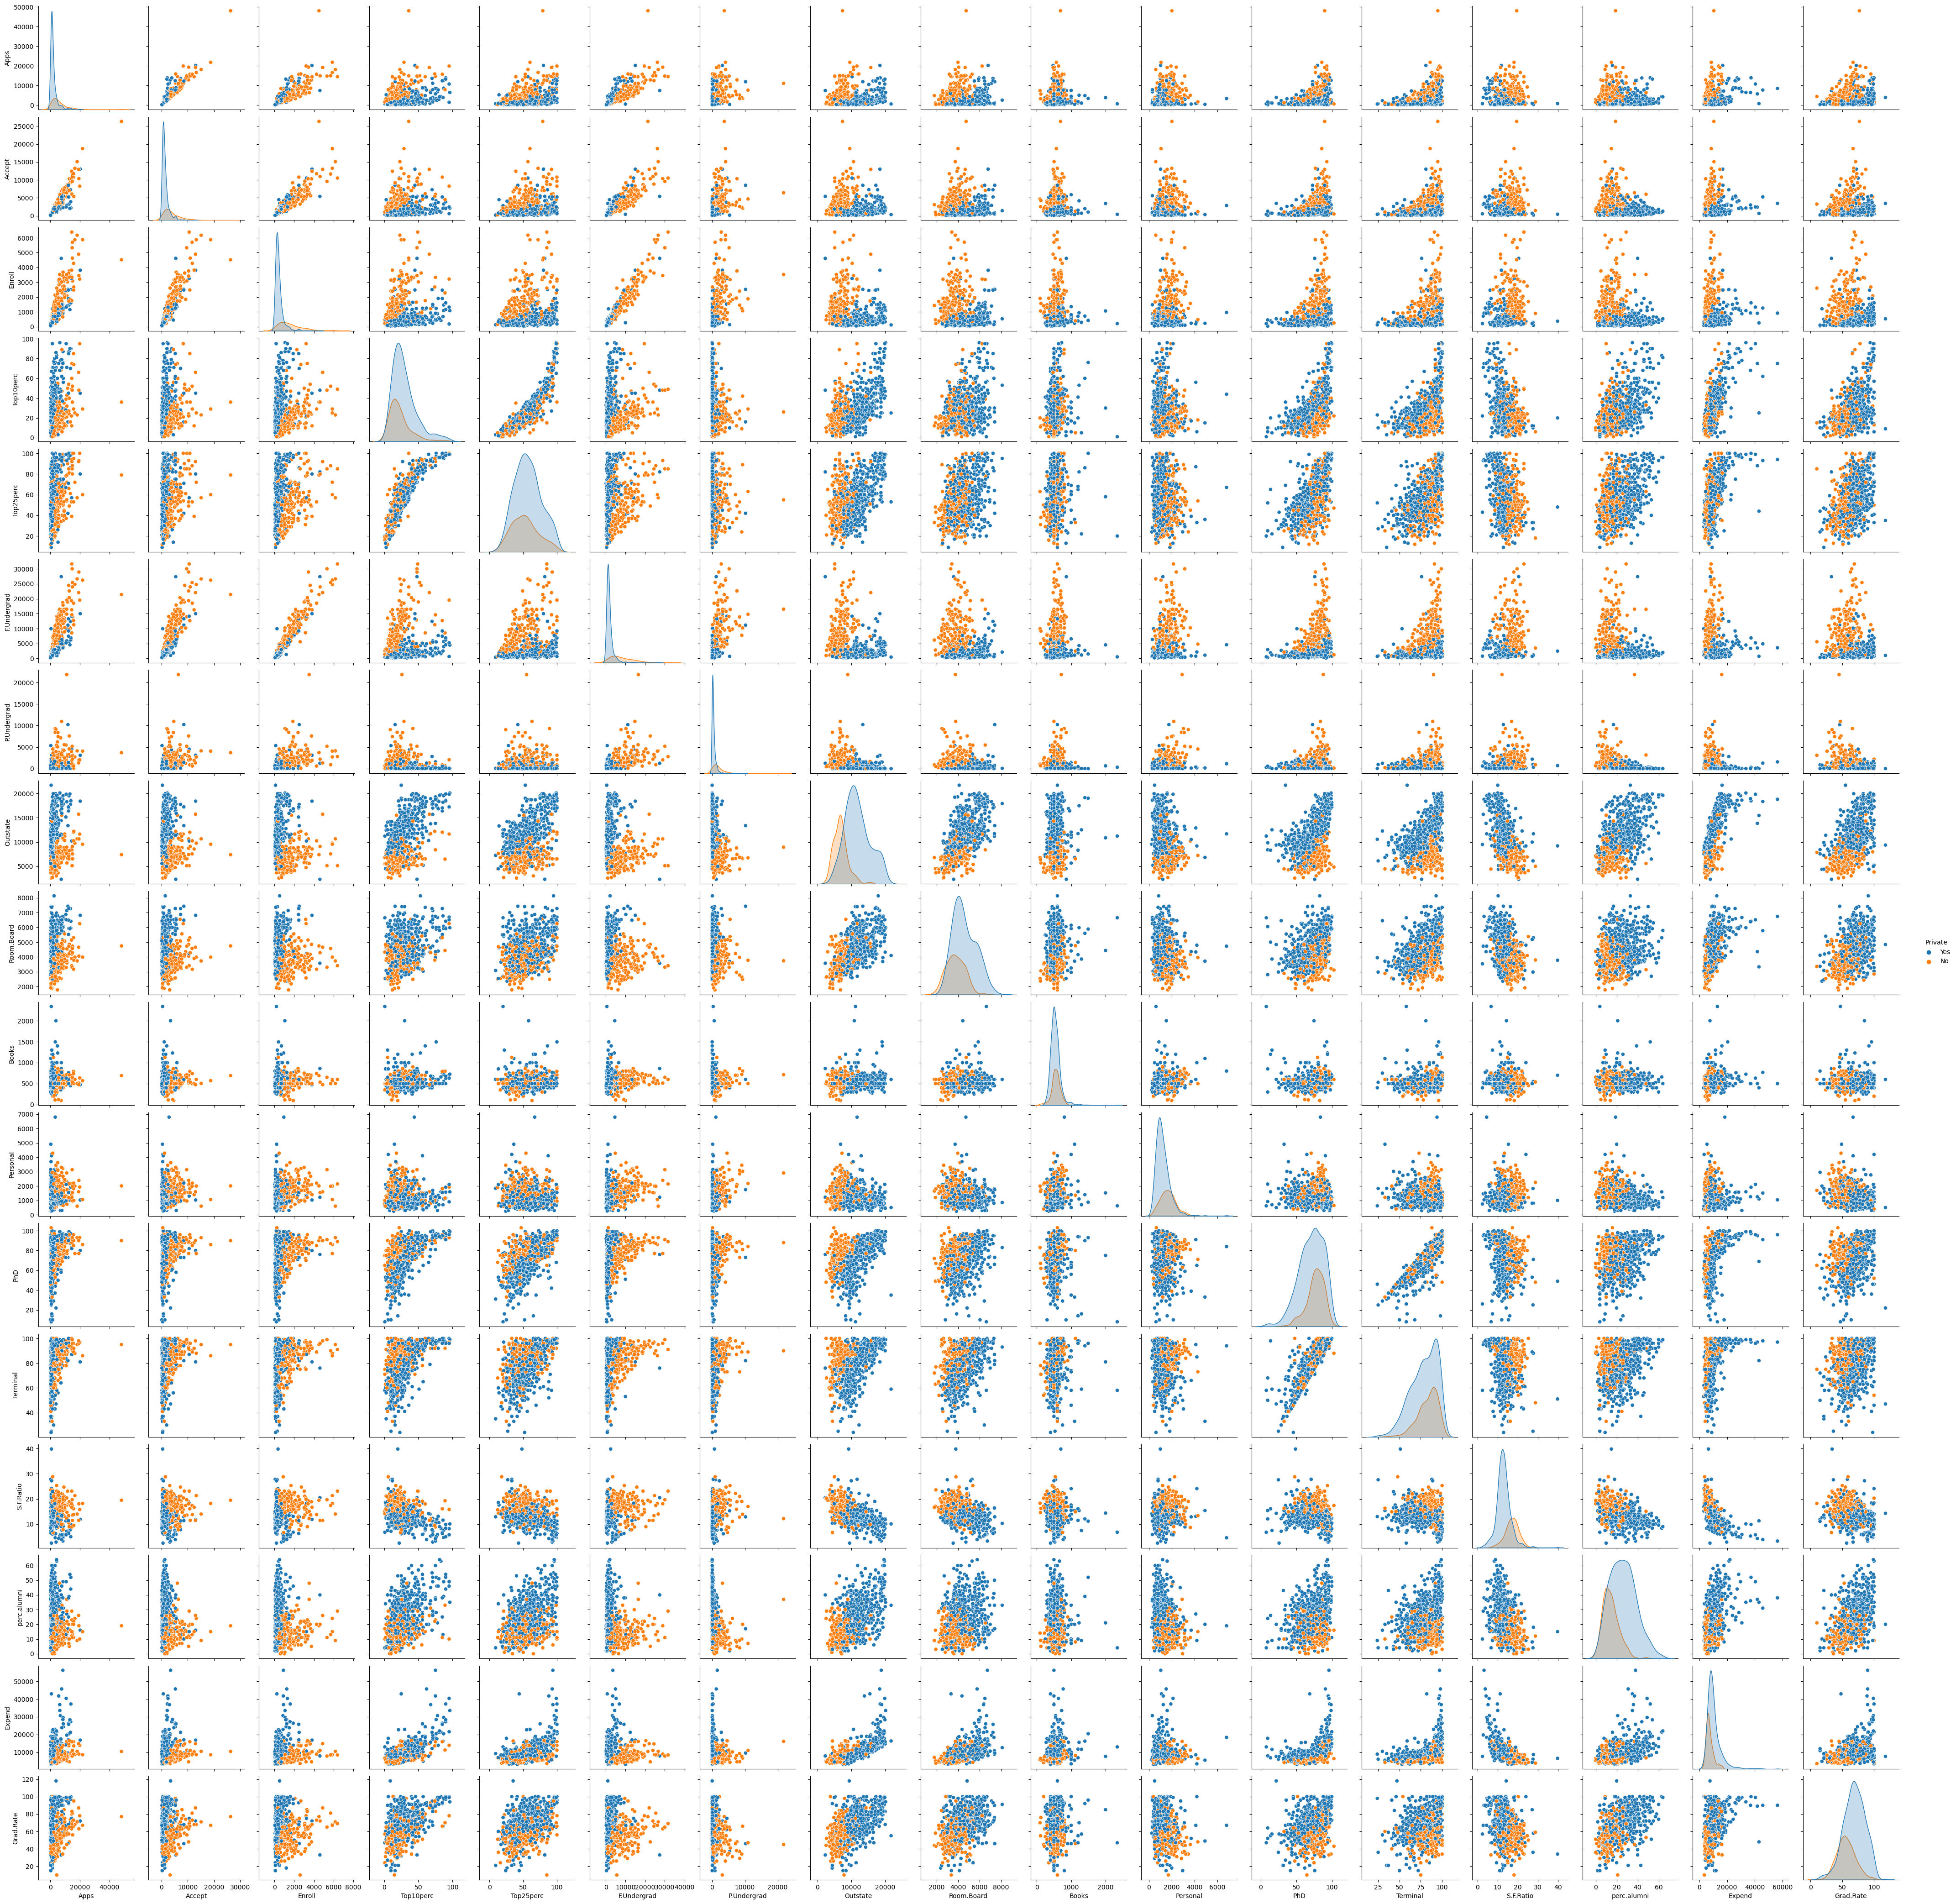

In [14]:
# Below pair plot shows the exact classification for the data (Private yes or no)
sns.pairplot(df, hue = 'Private')

In [51]:
# Predicting the class using KMean Clustering Algorithm

df = pd.read_csv('College_Data.csv')
df.drop('Unnamed: 0', axis= 1, inplace = True)

model = KMeans(2).fit(df.drop('Private', axis = 1))

df['Predict_Class'] = model.labels_


# To measure predict class vs actual we need to convert the Actual Private category into zeros and ones
def dummy0_1(car):
    if car == 'Yes': return 1
    else: return 0
    
df['Private'] = df['Private'].apply(dummy0_1)


print(classification_report(df['Predict_Class'],df['Private']))
confusion_matrix(df['Predict_Class'],df['Private'])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              precision    recall  f1-score   support

           0       0.35      0.69      0.46       108
           1       0.94      0.79      0.86       669

    accuracy                           0.78       777
   macro avg       0.64      0.74      0.66       777
weighted avg       0.86      0.78      0.81       777



array([[ 74,  34],
       [138, 531]], dtype=int64)